In [1]:
import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
%load_ext tensorboard

<h3 style=color:#3498db>///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</h3>

<h3 style=color:#3498db>Load imdb_s8k data and split them</h3>

In [2]:
# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3W3UND/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3W3UND/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3W3UND/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test']

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

<h3 style=color:#3498db>///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</h3>

<h3 style=color:#3498db>Single LSTM layer Function</h3>

In [4]:
def create_single_lstm_layer():
    # Hyperparameters
    embedding_dim = 64
    lstm_dim = 64
    dense_dim = 64

    # Build the model
    model = keras.Sequential([
                              layers.Embedding( tokenizer.vocab_size, embedding_dim ),

                              layers.Bidirectional( layers.LSTM( lstm_dim ) ),

                              layers.Dense(dense_dim, activation='relu'),
                              layers.Dense(1, activation='sigmoid')
                              ])
    
    # Set the training parameters
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

<h3 style=color:#3498db>Multiple LSTM layer Function</h3>

In [5]:
def create_multiple_lstm_layer():
    
    embedding_dim = 64
    lstm1_dim = 64
    lstm2_dim = 32
    dense_dim = 64

    # Build the model
    model = keras.Sequential([

                              layers.Embedding(tokenizer.vocab_size, embedding_dim),

                              layers.Bidirectional(layers.LSTM(lstm1_dim, return_sequences=True)),
                              layers.Bidirectional(layers.LSTM(lstm2_dim)),

                              layers.Dense(dense_dim, activation='relu'),
                              layers.Dense(1, activation='sigmoid')
                              ])
    
    # Set the training parameters
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

<h3 style=color:#3498db>///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</h3>

<h3 style=color:#3498db>Create Tensorboard Callback Class</h3>

In [6]:
log_dir_path_1 = "tmp/logs/lstm_singlelayer/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir_path_2 = "tmp/logs/lstm_multiplelayer/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_1 = keras.callbacks.TensorBoard(log_dir=log_dir_path_1, histogram_freq=1)
tensorboard_2 = keras.callbacks.TensorBoard(log_dir=log_dir_path_2, histogram_freq=1)

<h3 style=color:#3498db>///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</h3>

In [7]:
single_lstm_model = create_single_lstm_layer()
multiple_lstm_model = create_multiple_lstm_layer()

In [8]:
single_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
multiple_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        66048     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-tr

In [10]:
NUM_EPOCHS = 10

history1 = single_lstm_model.fit(
                                 train_dataset,
                                 epochs=NUM_EPOCHS,
                                 validation_data=test_dataset,
                                 callbacks=[tensorboard_1],
                                 verbose=1)

Epoch 1/10
98/98 [==============================] - 33s 248ms/step - loss: 0.5472 - accuracy: 0.6908 - val_loss: 0.3772 - val_accuracy: 0.8410
Epoch 2/10
98/98 [==============================] - 24s 243ms/step - loss: 0.3016 - accuracy: 0.8836 - val_loss: 0.3843 - val_accuracy: 0.8385
Epoch 3/10
98/98 [==============================] - 25s 246ms/step - loss: 0.2453 - accuracy: 0.9104 - val_loss: 0.3854 - val_accuracy: 0.8315
Epoch 4/10
98/98 [==============================] - 25s 246ms/step - loss: 0.2469 - accuracy: 0.9092 - val_loss: 0.4246 - val_accuracy: 0.8439
Epoch 5/10
98/98 [==============================] - 25s 248ms/step - loss: 0.1783 - accuracy: 0.9377 - val_loss: 0.3926 - val_accuracy: 0.8454
Epoch 6/10
98/98 [==============================] - 28s 285ms/step - loss: 0.1501 - accuracy: 0.9504 - val_loss: 0.4179 - val_accuracy: 0.8442
Epoch 7/10
98/98 [==============================] - 25s 247ms/step - loss: 0.1685 - accuracy: 0.9429 - val_loss: 0.4679 - val_accuracy: 0.8405

In [21]:
# %tensorboard --logdir tmp/logs/lstm_singlelayer/fit

<h3 style=color:#3498db>///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</h3>

In [12]:
NUM_EPOCHS = 10

# Train the model
history2 = multiple_lstm_model.fit(
                                   train_dataset,
                                   epochs=NUM_EPOCHS,
                                   validation_data=test_dataset,
                                   callbacks=[tensorboard_2],
                                   verbose=1
                                   )

Epoch 1/10
98/98 [==============================] - 49s 443ms/step - loss: 0.6329 - accuracy: 0.6349 - val_loss: 0.5067 - val_accuracy: 0.7643
Epoch 2/10
98/98 [==============================] - 43s 436ms/step - loss: 0.4092 - accuracy: 0.8241 - val_loss: 0.4150 - val_accuracy: 0.8155
Epoch 3/10
98/98 [==============================] - 44s 441ms/step - loss: 0.3129 - accuracy: 0.8764 - val_loss: 0.3990 - val_accuracy: 0.8399
Epoch 4/10
98/98 [==============================] - 44s 445ms/step - loss: 0.2613 - accuracy: 0.8988 - val_loss: 0.3852 - val_accuracy: 0.8402
Epoch 5/10
98/98 [==============================] - 44s 446ms/step - loss: 0.2023 - accuracy: 0.9257 - val_loss: 0.4162 - val_accuracy: 0.8386
Epoch 6/10
98/98 [==============================] - 44s 443ms/step - loss: 0.2013 - accuracy: 0.9251 - val_loss: 0.4202 - val_accuracy: 0.8321
Epoch 7/10
98/98 [==============================] - 52s 524ms/step - loss: 0.1820 - accuracy: 0.9324 - val_loss: 0.4657 - val_accuracy: 0.8343

In [20]:
# %tensorboard --logdir tmp/logs/lstm_multiplelayer/fit

<h3 style=color:#3498db>///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////</h3>

<h3 style=color:#3498db>Plot Accuracy and Loss</h3>

In [17]:
ModelName = ''
import matplotlib.pyplot as plt

def plot_loss_accuracy(modelhistory, modelname):
    
    loss     = modelhistory.history['loss']
    val_loss = modelhistory.history['val_loss']
    acc      = modelhistory.history['accuracy']
    val_acc  = modelhistory.history['val_accuracy']

    epochs   = range(1,len(acc)+1) # Get number of epochs

    plt.style.use('seaborn')
    
    # Create Subplots System
    fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

    # Change Figure Size
    fig.set_size_inches(12, 6)

    # Fig Name
    fig.suptitle(modelname, fontsize=18)
    
    # First Axies
    ax1.plot(epochs, loss, label="Training Loss")
    ax1.plot(epochs, val_loss, label="Validation Loss")
    ax1.set_title('Loss')
    ax1.set_xlim(0,len(acc)+1)
    ax1.set_ylim(0,1.0)
    ax1.legend()

    # Second Axies
    ax2.plot(epochs, acc, label="Training Accuracy")
    ax2.plot(epochs, val_acc, label="Validation Accuracy")
    ax2.set_title('Accuracy')
    ax2.set_xlim(0,len(acc)+1)
    ax2.legend()

    # Change Padding to Tight
    plt.tight_layout()

    # Show The Figure
    plt.show()

    # Save The Figure To JPG File
    #fig.savefig('tmp\\'+modelname+'.jpg')

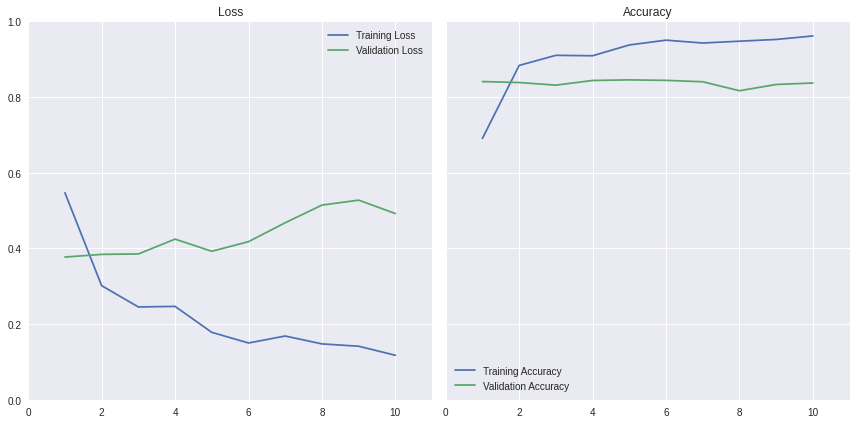

In [18]:
plot_loss_accuracy(history1, ModelName)

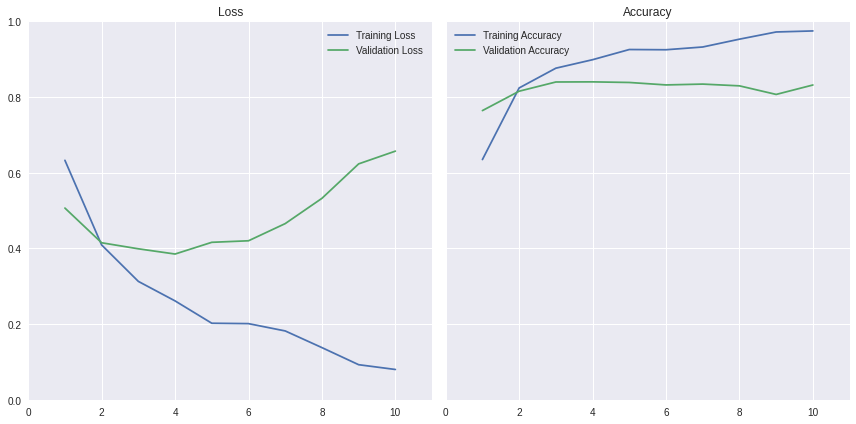

In [19]:
plot_loss_accuracy(history2, ModelName)